In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [4]:
#data downloaded from github 
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv")

In [5]:
df.columns
#checking the column names

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

<AxesSubplot:>

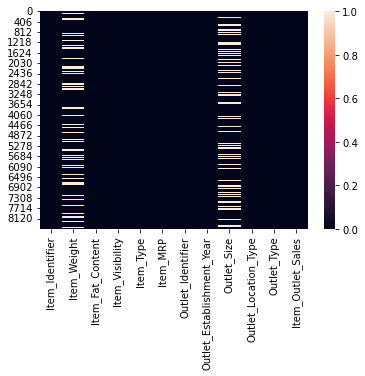

In [6]:
sns.heatmap(df.isnull())
#checking the null values using heatmap,showing there are many in outlet size and item weight , so to check this in values we will use below command

In [7]:
df.isnull().sum()
# checking the count of null values, there are no nulls

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df.dtypes
#we will require encoding to convert oject into float

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [9]:
df.describe()
#The gap between std dev and mean clearly indicated data has outliers , which we will check and remove later

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<AxesSubplot:>

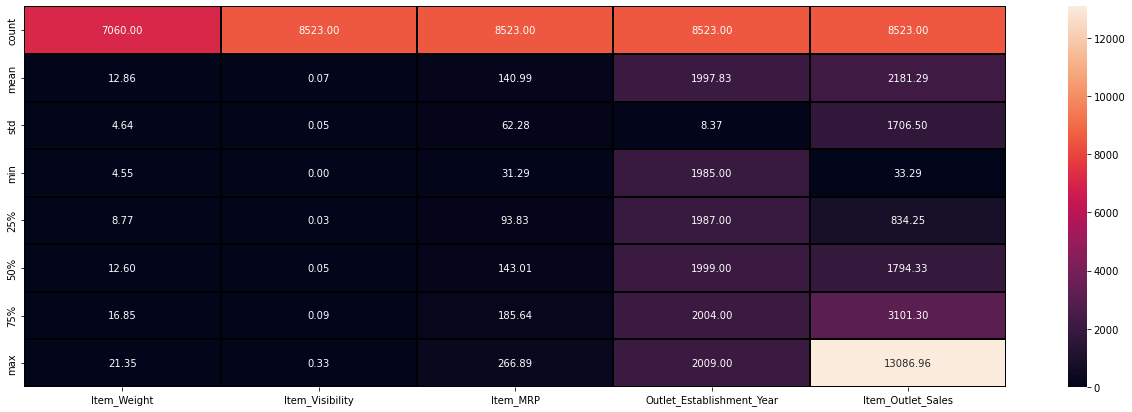

In [10]:
#Describing data in heatmap
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [11]:
df.shape
#data has 12 columns and 8523 rows

(8523, 12)

In [12]:
# First we will use data encloding for converting string values to numeric for object datatypes
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [13]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [14]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.300,1.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380
1,8.0,5.920,2.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228
2,662.0,17.500,1.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700
3,1121.0,19.200,2.0,0.000000,6.0,182.0950,0.0,1998,NaN,2.0,0.0,732.3800
4,1297.0,8.930,1.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,1.0,0.056783,13.0,214.5218,1.0,1987,0.0,2.0,1.0,2778.3834
8519,897.0,8.380,2.0,0.046982,0.0,108.1570,7.0,2002,NaN,1.0,1.0,549.2850
8520,1357.0,10.600,1.0,0.035186,8.0,85.1224,6.0,2004,2.0,1.0,1.0,1193.1136
8521,681.0,7.210,2.0,0.145221,13.0,103.1332,3.0,2009,1.0,2.0,2.0,1845.5976


In [18]:
#using simple imputer strategy mean to replacce NAN values with mean 
import numpy as np
imp=SimpleImputer(missing_values=np.nan,strategy='mean')
df['Item_Weight']=imp.fit_transform(df['Item_Weight'].values.reshape(-1,1))
df['Outlet_Size']=imp.fit_transform(df['Outlet_Size'].values.reshape(-1,1))

In [19]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [20]:
#now we will check correlation using tables and charts
dfcorr=df.corr()
dfcorr
#strong correlation of TV with highest followed by newspaaper and radio to sales, Unnamed S.N. must be dropped which we will

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.098114,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.001414,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.017331,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.009479,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.098114,-0.017331,1.000000,0.034042,-0.115958,-0.000876,-0.002357,-0.000189,-0.011752,-0.004102,-0.004214,0.009800
Item_Visibility,-0.025482,-0.012049,0.034042,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.079563,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.115958,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.001500,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,-0.000876,-0.001315,0.032651,1.000000,0.003319,0.005020,0.004931,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,-0.002357,-0.100439,0.001656,0.003319,1.000000,0.079035,0.462395,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.008301,-0.000189,-0.074834,0.004970,0.005020,0.079035,1.000000,0.266949,-0.089216,-0.122304,-0.049135
Outlet_Size,0.001414,-0.009479,-0.011752,0.079563,-0.001500,0.004931,0.462395,0.266949,1.000000,-0.607884,-0.266561,-0.111559
Outlet_Location_Type,0.003656,0.004088,-0.004102,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.607884,1.000000,0.467219,0.089367


<AxesSubplot:>

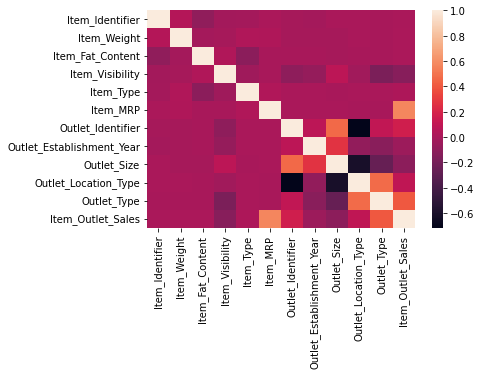

In [21]:
sns.heatmap(dfcorr)
#above observations can be seen in graph below

In [22]:
#Here using diff chart and below table can see very low corr of Item Identifier and Fat Content with sales, so we will drop them
dfcorr["Item_Outlet_Sales"].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Outlet_Type                  0.401522
Outlet_Identifier            0.162325
Outlet_Location_Type         0.089367
Item_Type                    0.017048
Item_Weight                  0.011550
Item_Fat_Content             0.009800
Item_Identifier              0.002869
Outlet_Establishment_Year   -0.049135
Outlet_Size                 -0.111559
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

In [25]:
df1=df.drop(["Item_Identifier","Item_Fat_Content"],axis=1)
df1

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0.016047,4.0,249.8092,9.0,1999,1.000000,0.0,1.0,3735.1380
1,5.920,0.019278,14.0,48.2692,3.0,2009,1.000000,2.0,2.0,443.4228
2,17.500,0.016760,10.0,141.6180,9.0,1999,1.000000,0.0,1.0,2097.2700
3,19.200,0.000000,6.0,182.0950,0.0,1998,1.238181,2.0,0.0,732.3800
4,8.930,0.000000,9.0,53.8614,1.0,1987,0.000000,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,13.0,214.5218,1.0,1987,0.000000,2.0,1.0,2778.3834
8519,8.380,0.046982,0.0,108.1570,7.0,2002,1.238181,1.0,1.0,549.2850
8520,10.600,0.035186,8.0,85.1224,6.0,2004,2.000000,1.0,1.0,1193.1136
8521,7.210,0.145221,13.0,103.1332,3.0,2009,1.000000,2.0,2.0,1845.5976


In [26]:
df1.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

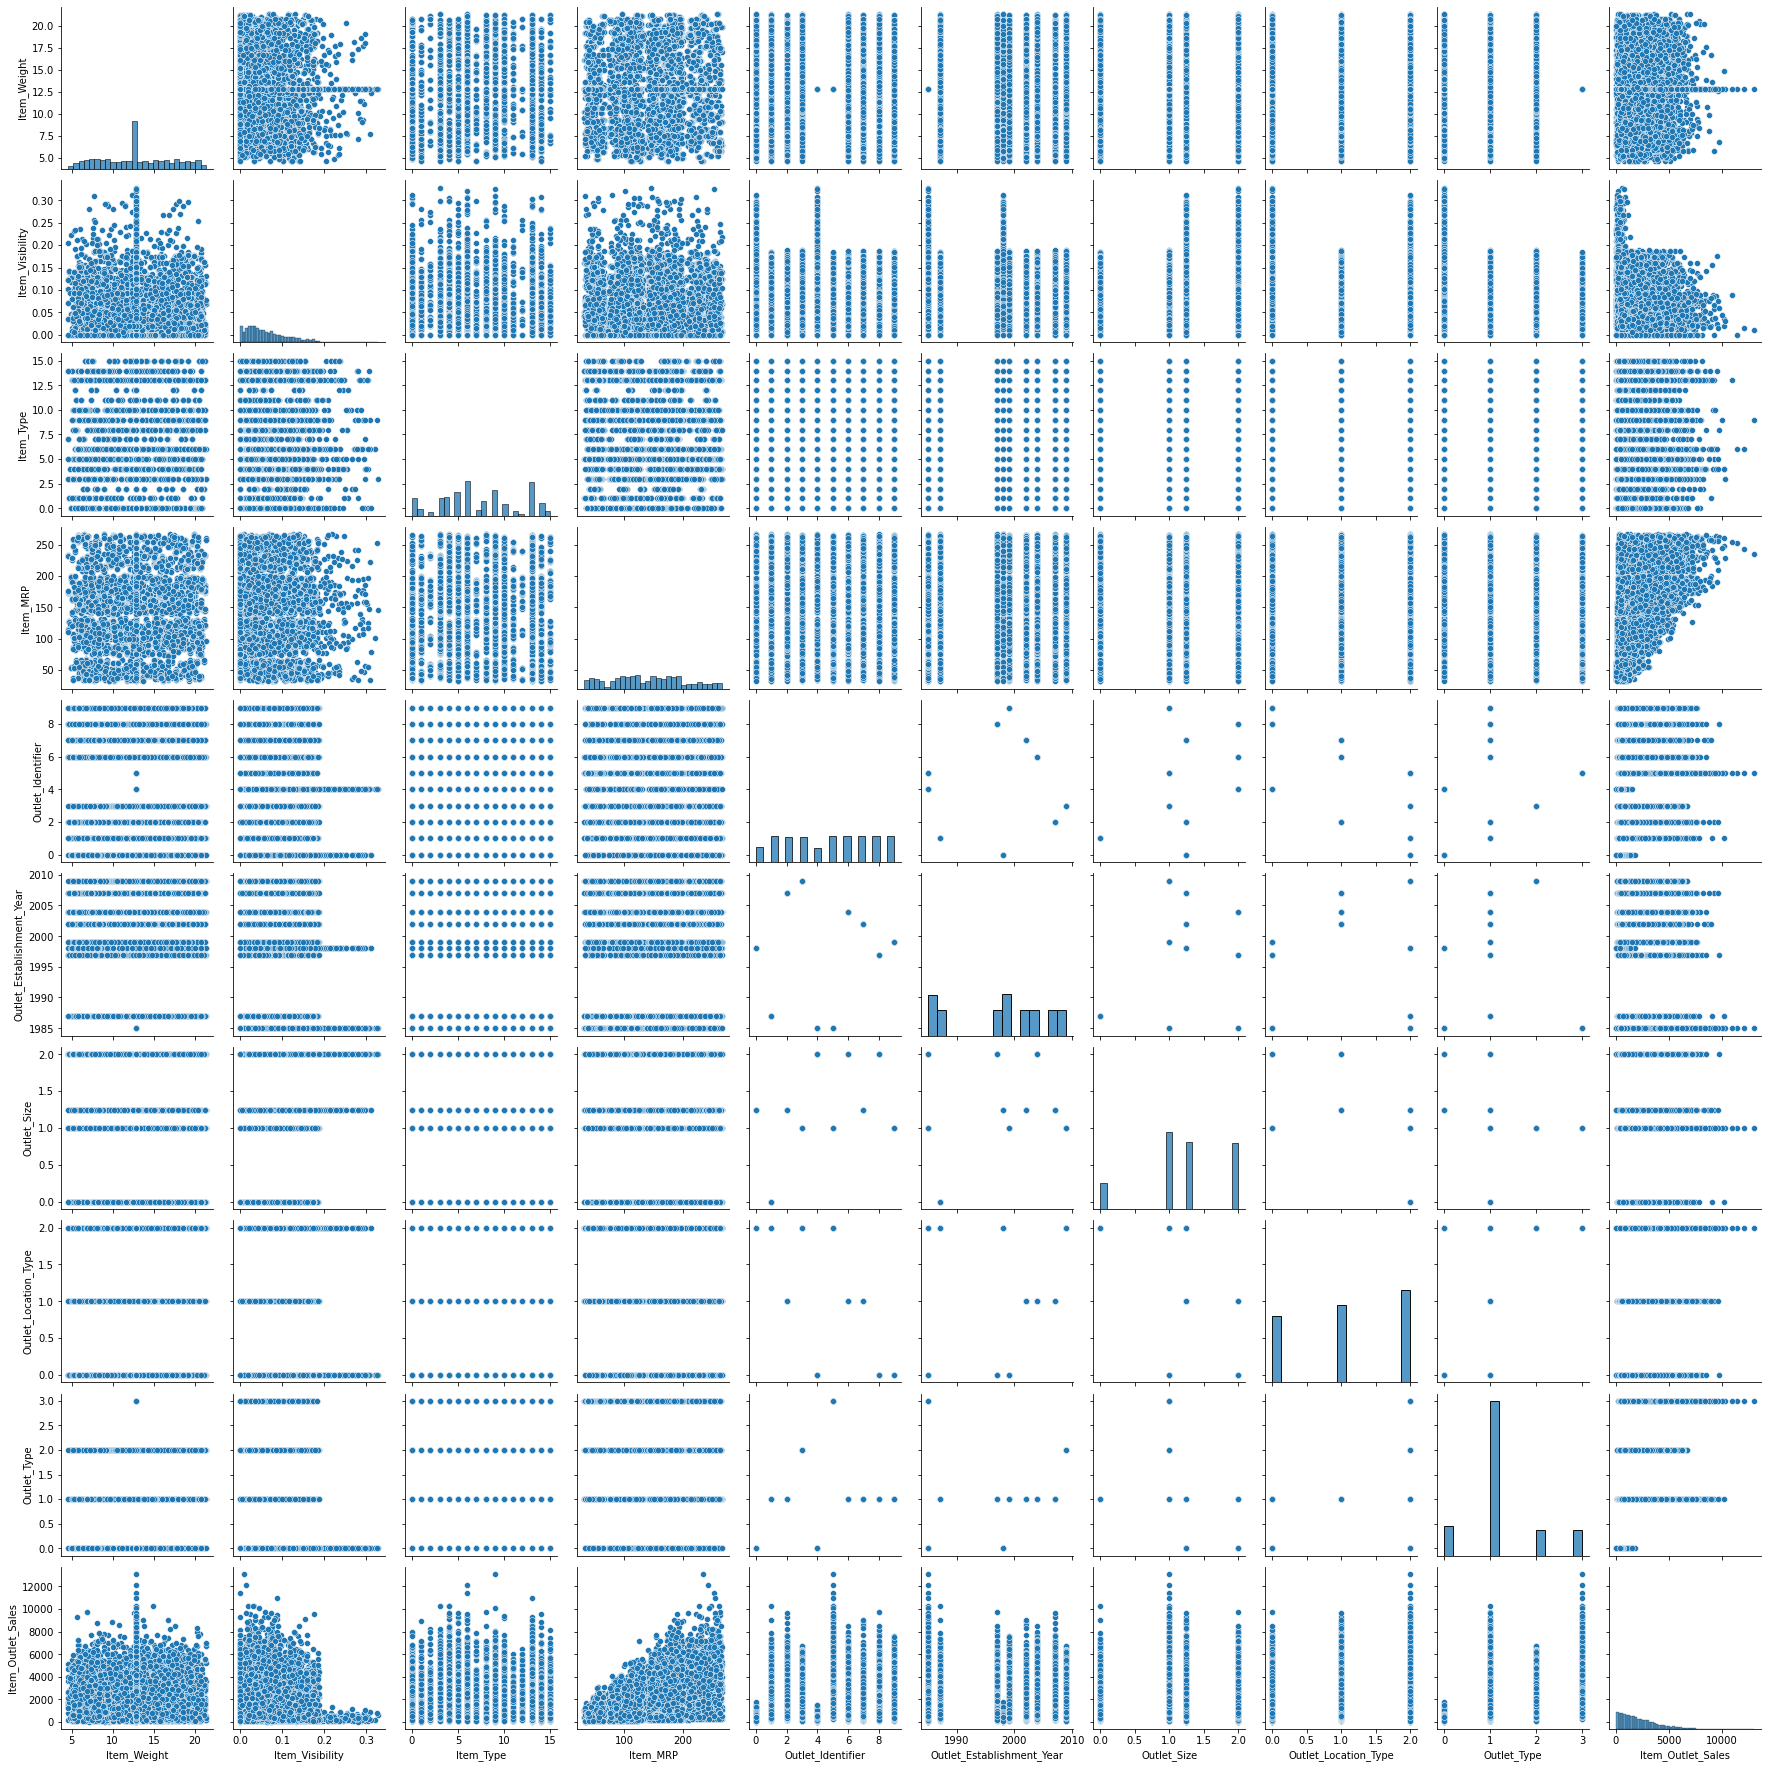

In [27]:
sns.pairplot(df1)
#to visually see positive , negative colrrelat

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

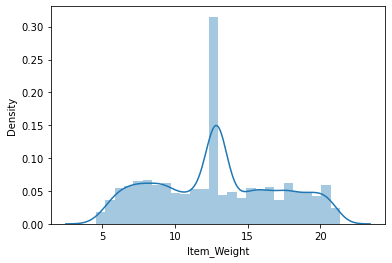

In [28]:
#we will check the data distribution using distplots
sns.distplot(df['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

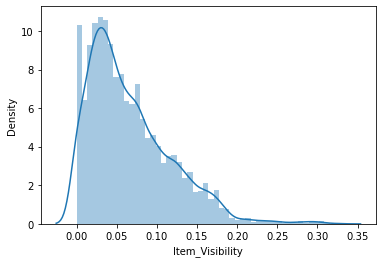

In [29]:
sns.distplot(df['Item_Visibility'])

<AxesSubplot:xlabel='Item_Type', ylabel='Density'>

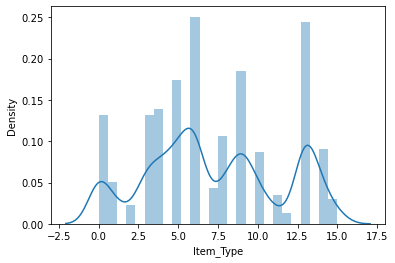

In [30]:
sns.distplot(df['Item_Type'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

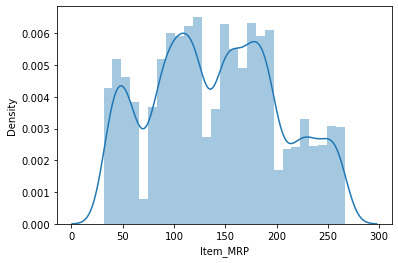

In [31]:
sns.distplot(df['Item_MRP'])

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Density'>

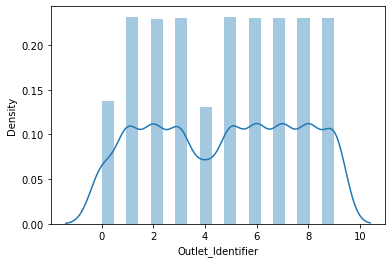

In [32]:
sns.distplot(df['Outlet_Identifier'])

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

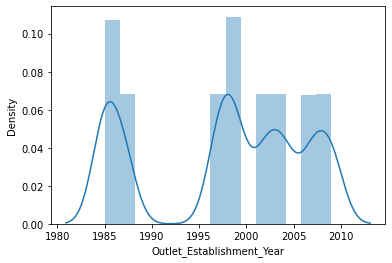

In [33]:
sns.distplot(df['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='Density'>

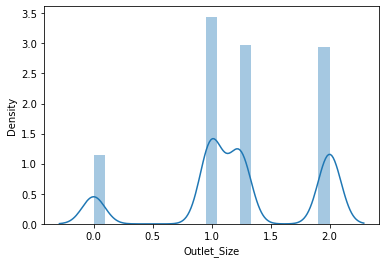

In [34]:
sns.distplot(df['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Density'>

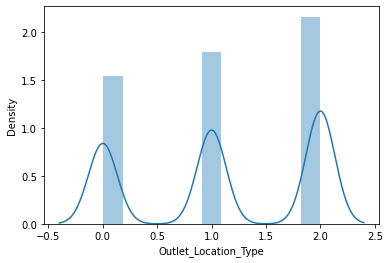

In [35]:
sns.distplot(df['Outlet_Location_Type'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='Density'>

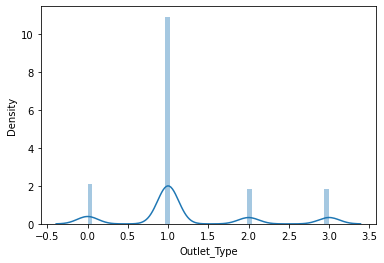

In [36]:
sns.distplot(df['Outlet_Type'])

Item_Weight                     AxesSubplot(0.125,0.536818;0.110714x0.343182)
Item_Visibility              AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Item_Type                    AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Item_MRP                     AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Outlet_Identifier            AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Outlet_Establishment_Year    AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Outlet_Size                        AxesSubplot(0.125,0.125;0.110714x0.343182)
Outlet_Location_Type            AxesSubplot(0.257857,0.125;0.110714x0.343182)
Outlet_Type                     AxesSubplot(0.390714,0.125;0.110714x0.343182)
Item_Outlet_Sales               AxesSubplot(0.523571,0.125;0.110714x0.343182)
dtype: object

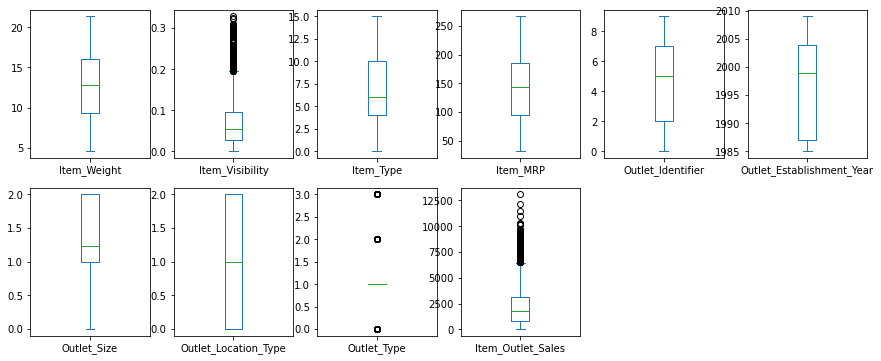

In [37]:
df1.plot(kind='box',subplots=True,layout=(2,6),figsize=(15,6))
#from the above ditribution and below box plot the data clearly displays outliers which needs to be removed as per next code

In [38]:
#removing outliers from the  data using Zscore value
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.841872,0.970732,0.766479,1.747454,1.507813,0.139541,0.403265,1.369334,0.252658,0.910601
1,1.641706,0.908111,1.608963,1.489023,0.607071,1.334103,0.403265,1.091569,1.002972,1.018440
2,1.098554,0.956917,0.658786,0.010040,1.507813,0.139541,0.403265,1.369334,0.252658,0.049238
3,1.500838,1.281758,0.291391,0.660050,1.664513,0.020085,0.000000,1.091569,1.508289,0.849103
4,0.929428,1.281758,0.421242,1.399220,1.312032,1.293934,2.096369,1.091569,0.252658,0.695373
...,...,...,...,...,...,...,...,...,...,...
8518,1.418084,0.181193,1.371418,1.180783,1.312032,1.293934,2.096369,1.091569,0.252658,0.349915
8519,1.059578,0.371154,1.716656,0.527301,0.802852,0.497909,0.000000,0.138882,0.252658,0.956402
8520,0.534243,0.599784,0.183698,0.897208,0.450371,0.736822,1.289839,0.138882,0.252658,0.579100
8521,1.336444,1.532880,1.371418,0.607977,0.607071,1.334103,0.403265,1.091569,1.002972,0.196725


In [39]:
z=np.abs(zscore(df1))

In [40]:
z.shape

(8523, 10)

In [41]:
threshold=3
print(np.where(z>3))

(array([  49,   83,  108,  130,  145,  174,  276,  304,  333,  373,  434,
        456,  472,  502,  521,  532,  661,  694,  753,  809,  854,  935,
        991,  997, 1009, 1138, 1159, 1254, 1272, 1291, 1311, 1324, 1434,
       1450, 1496, 1501, 1506, 1560, 1575, 1644, 1651, 1805, 1827, 1841,
       1859, 1998, 2088, 2109, 2122, 2216, 2238, 2251, 2293, 2324, 2439,
       2445, 2516, 2535, 2586, 2613, 2728, 2776, 2855, 2895, 3017, 3083,
       3087, 3098, 3154, 3206, 3234, 3286, 3399, 3407, 3458, 3474, 3488,
       3497, 3540, 3667, 3709, 3720, 3750, 3757, 3767, 3884, 3993, 4006,
       4219, 4289, 4346, 4349, 4382, 4408, 4530, 4656, 4674, 4676, 4681,
       4772, 4789, 4888, 4941, 4961, 4991, 5031, 5065, 5150, 5177, 5185,
       5223, 5287, 5315, 5374, 5500, 5550, 5619, 5732, 5734, 5752, 5795,
       5799, 5812, 5837, 5880, 5891, 5946, 5977, 6000, 6008, 6012, 6134,
       6179, 6334, 6409, 6536, 6537, 6541, 6576, 6606, 6622, 6674, 6786,
       6886, 6903, 6993, 7005, 7016, 7076, 7088, 7

In [42]:
len(np.where(z>3)[0])

185

In [43]:
df2=df1[(z<3).all(axis=1)]

In [44]:
print("old dataframe",df1.shape)
print("new dataframe",df2.shape)
print("total dropped",df1.shape[0]-df2.shape[0])

old dataframe (8523, 10)
new dataframe (8338, 10)
total dropped 185


In [45]:
loss_percent=(8523-8338)/8523*100
print(loss_percent,"%")
#here by removing the outliers loosign 2.1% of data which is fine as it will help in gettign better model accuracy

2.170597207556025 %


In [46]:
#we will now check skewness in data
df2.skew()

Item_Weight                  0.089291
Item_Visibility              0.794272
Item_Type                    0.098295
Item_MRP                     0.138990
Outlet_Identifier           -0.065135
Outlet_Establishment_Year   -0.423379
Outlet_Size                 -0.427452
Outlet_Location_Type        -0.202674
Outlet_Type                  0.956727
Item_Outlet_Sales            0.878267
dtype: float64

In [47]:
# We will break data into input and output and then remove skewness
x=df2.drop("Item_Outlet_Sales",axis=1)
y=df2["Item_Outlet_Sales"]

In [48]:
x

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0.016047,4.0,249.8092,9.0,1999,1.000000,0.0,1.0
1,5.920,0.019278,14.0,48.2692,3.0,2009,1.000000,2.0,2.0
2,17.500,0.016760,10.0,141.6180,9.0,1999,1.000000,0.0,1.0
3,19.200,0.000000,6.0,182.0950,0.0,1998,1.238181,2.0,0.0
4,8.930,0.000000,9.0,53.8614,1.0,1987,0.000000,2.0,1.0
...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,13.0,214.5218,1.0,1987,0.000000,2.0,1.0
8519,8.380,0.046982,0.0,108.1570,7.0,2002,1.238181,1.0,1.0
8520,10.600,0.035186,8.0,85.1224,6.0,2004,2.000000,1.0,1.0
8521,7.210,0.145221,13.0,103.1332,3.0,2009,1.000000,2.0,2.0


In [49]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8338, dtype: float64

In [57]:
#checking vif to identify multicollinierity and can see below that no column is similarly correlated
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):
    vif=pd.DataFrame()
    vif["Variables"]=x.columns
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)
calc_vif(x)
#we will drop outlet establishment year as it has high VIF and very low correlation

,Variables,VIF Factor
0,Item_Weight,10.159378
1,Item_Visibility,2.887722
2,Item_Type,3.961926
3,Item_MRP,6.133778
4,Outlet_Identifier,15.604726
5,Outlet_Establishment_Year,54.251433
6,Outlet_Size,8.561992
7,Outlet_Location_Type,16.350889
8,Outlet_Type,8.434550


In [68]:
x1=x.drop("Outlet_Establishment_Year",axis=1)
x1

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0.016047,4.0,249.8092,9.0,1.000000,0.0,1.0
1,5.920,0.019278,14.0,48.2692,3.0,1.000000,2.0,2.0
2,17.500,0.016760,10.0,141.6180,9.0,1.000000,0.0,1.0
3,19.200,0.000000,6.0,182.0950,0.0,1.238181,2.0,0.0
4,8.930,0.000000,9.0,53.8614,1.0,0.000000,2.0,1.0
...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,13.0,214.5218,1.0,0.000000,2.0,1.0
8519,8.380,0.046982,0.0,108.1570,7.0,1.238181,1.0,1.0
8520,10.600,0.035186,8.0,85.1224,6.0,2.000000,1.0,1.0
8521,7.210,0.145221,13.0,103.1332,3.0,1.000000,2.0,2.0


In [50]:
#Transform data to remove skewness
from sklearn.preprocessing import power_transform

In [69]:
x2=power_transform(x1,method='yeo-johnson')
pd.DataFrame(x2).skew()

0   -0.069766
1    0.115911
2   -0.165742
3   -0.112576
4   -0.214995
5   -0.086807
6   -0.216731
7    0.010691
dtype: float64

In [59]:
# as we have now removed the skewness , let form the modekl using Linear Regression as the output is a continues integer
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score,accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [70]:
#finding best random state
for i in range(0,100):
    x2_train,x2_test,y_train,y_test=train_test_split(x2,y,test_size=0.2,random_state=i)
    lr.fit(x2_train,y_train)
    pred_train=lr.predict(x2_train)
    pred_test=lr.predict(x2_test)
    print(f"at random state{i},the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"at random state{i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")


at random state0,the training accuracy is:- 0.5151553854350271
at random state0,the testing accuracy is:- 0.5055230784273687


at random state1,the training accuracy is:- 0.5119326776502834
at random state1,the testing accuracy is:- 0.5188606180402834


at random state2,the training accuracy is:- 0.5141530099352325
at random state2,the testing accuracy is:- 0.5085013738025723


at random state3,the training accuracy is:- 0.5172411222328087
at random state3,the testing accuracy is:- 0.4980200652035154


at random state4,the training accuracy is:- 0.5079453761637615
at random state4,the testing accuracy is:- 0.5316124808441371


at random state5,the training accuracy is:- 0.5157212350898627
at random state5,the testing accuracy is:- 0.5019917772814244


at random state6,the training accuracy is:- 0.5166535007337316
at random state6,the testing accuracy is:- 0.5003662080386602


at random state7,the training accuracy is:- 0.516326969497956
at random state7,the testing accuracy is:- 0.5013

at random state95,the training accuracy is:- 0.5109075225274577
at random state95,the testing accuracy is:- 0.5215388572813511


at random state96,the training accuracy is:- 0.5199804402982016
at random state96,the testing accuracy is:- 0.48685992092468733


at random state97,the training accuracy is:- 0.5125867871693821
at random state97,the testing accuracy is:- 0.5152921439092386


at random state98,the training accuracy is:- 0.5160306626045759
at random state98,the testing accuracy is:- 0.5029965585833311


at random state99,the training accuracy is:- 0.5182130729248012
at random state99,the testing accuracy is:- 0.4916643286730775




In [71]:
#We will go with random state 3,7,17
x2_train,x2_test,y_train,y_test=train_test_split(x2,y,test_size=0.2,random_state=13)
lr.fit(x2_train,y_train)
predlr=lr.predict(x2_test)
print(r2_score(y_test,predlr))
cvscore=cross_val_score(lr,x2,y,cv=5)
cvm=cvscore.mean()
print("cross val score:",cvm)

0.5134876040124059
cross val score: 0.511801622457635


In [73]:
#Hypertuning , getting best parameters
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x2_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [75]:
#applying the same parameters
ls=Lasso(alpha=1,random_state=0)
ls.fit(x2_train,y_train)
ls.score(x2_train,y_train)
pred_ls=ls.predict(x2_test)
lss=r2_score(y_test,pred_ls)
lss
cvscore1=cross_val_score(ls,x2,y,cv=5)
cvm1=cvscore1.mean()
print("accuracy score",lss)
print("cross val score:",cvm1)

accuracy score 0.5135119435304015
cross val score: 0.5118153114943036


In [76]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Ridge
parameters={'alpha':[.0001,.001,.1,1,10],'random_state':list(range(0,10))}
rd=Ridge()
cl=GridSearchCV(rd,parameters)
cl.fit(x2_train,y_train)
print(cl.best_params_)

{'alpha': 10, 'random_state': 0}


In [77]:
rd=Ridge(alpha=10,random_state=0)
rd.fit(x2_train,y_train)
rd.score(x2_train,y_train)
pred_rd=rd.predict(x2_test)
rdd=r2_score(y_test,pred_rd)
cvscore2=cross_val_score(rd,x2,y,cv=5)
cvm2=cvscore2.mean()
print("accuracy score",rdd)
print("cross val score:",cvm2)

accuracy score 0.5135267699803634
cross val score: 0.5118065418611467


In [78]:
#We will check more models to see if we can still get better result for more improvement
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x2_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [80]:
#Applying the crieterias
rf=RandomForestRegressor(criterion="mae",max_features="log2")
rf.fit(x2_train,y_train)
rf.score(x2_train,y_train)
pred_decision=rf.predict(x2_test)
rfs=r2_score(y_test,pred_decision)
cvs3=cross_val_score(rf,x2,y,cv=5)
cvm3=cvs3.mean()
print("accuracy score",rfs)
print("cross val score:",cvm3)

accuracy score 0.5604983024360819
cross val score: 0.5569696453797979


In [92]:
#above gives better % accuracy and cross val score as well and they are very close to each other
#than previous methods so we will save this model
import pickle

In [93]:
filename='bigdatamart.pkl'
pickle.dump(rf,open(filename,'wb'))

In [94]:
#Conclusion 
loaded_model=pickle.load(open('bigdatamart.pkl','rb'))
result=loaded_model.score(x2_test,y_test)
print(result)
                        

0.5604983024360819


In [95]:
#We will now bring data which is in 2nd file to predict the sales and will drop columns which we dropped while preparing this model
#data downloaded from github 
dtest=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")


In [98]:
dtest.isnull().sum()


Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [102]:
#dropping the columns from test data as input of our model dont have these
dtest1=dtest.drop(["Item_Identifier","Item_Fat_Content","Outlet_Establishment_Year",],axis=1)
dtest1

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,0.007565,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1
1,8.300,0.038428,Dairy,87.3198,OUT017,NaN,Tier 2,Supermarket Type1
2,14.600,0.099575,Others,241.7538,OUT010,NaN,Tier 3,Grocery Store
3,7.315,0.015388,Snack Foods,155.0340,OUT017,NaN,Tier 2,Supermarket Type1
4,NaN,0.118599,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...
5676,10.500,0.013496,Snack Foods,141.3154,OUT046,Small,Tier 1,Supermarket Type1
5677,7.600,0.142991,Starchy Foods,169.1448,OUT018,Medium,Tier 3,Supermarket Type2
5678,10.000,0.073529,Health and Hygiene,118.7440,OUT045,NaN,Tier 2,Supermarket Type1
5679,15.300,0.000000,Canned,214.6218,OUT017,NaN,Tier 2,Supermarket Type1


In [103]:
#we will now convert all string to float of test data
for i in dtest1.columns:
    if dtest1[i].dtypes=="object":
        dtest1[i]=enc.fit_transform(dtest1[i].values.reshape(-1,1))

In [104]:
dtest1

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,0.007565,13.0,107.8622,9.0,1.0,0.0,1.0
1,8.300,0.038428,4.0,87.3198,2.0,NaN,1.0,1.0
2,14.600,0.099575,11.0,241.7538,0.0,NaN,2.0,0.0
3,7.315,0.015388,13.0,155.0340,2.0,NaN,1.0,1.0
4,NaN,0.118599,4.0,234.2300,5.0,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...
5676,10.500,0.013496,13.0,141.3154,8.0,2.0,0.0,1.0
5677,7.600,0.142991,15.0,169.1448,3.0,1.0,2.0,2.0
5678,10.000,0.073529,8.0,118.7440,7.0,NaN,1.0,1.0
5679,15.300,0.000000,3.0,214.6218,2.0,NaN,1.0,1.0


In [105]:
#replacing all NAN to mean value
import numpy as np
imp=SimpleImputer(missing_values=np.nan,strategy='mean')
dtest1['Item_Weight']=imp.fit_transform(dtest1['Item_Weight'].values.reshape(-1,1))
dtest1['Outlet_Size']=imp.fit_transform(dtest1['Outlet_Size'].values.reshape(-1,1))

In [106]:
dtest1

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0.007565,13.0,107.8622,9.0,1.000000,0.0,1.0
1,8.300000,0.038428,4.0,87.3198,2.0,1.238282,1.0,1.0
2,14.600000,0.099575,11.0,241.7538,0.0,1.238282,2.0,0.0
3,7.315000,0.015388,13.0,155.0340,2.0,1.238282,1.0,1.0
4,12.695633,0.118599,4.0,234.2300,5.0,1.000000,2.0,3.0
...,...,...,...,...,...,...,...,...
5676,10.500000,0.013496,13.0,141.3154,8.0,2.000000,0.0,1.0
5677,7.600000,0.142991,15.0,169.1448,3.0,1.000000,2.0,2.0
5678,10.000000,0.073529,8.0,118.7440,7.0,1.238282,1.0,1.0
5679,15.300000,0.000000,3.0,214.6218,2.0,1.238282,1.0,1.0


In [113]:
#conclusion=pd.DataFrame([loaded_model.predict(dtest1)[:],pred_decision[:]],index=["Predicted","Original"])
#predicting the sales using the model saved
conclusion=pd.DataFrame([loaded_model.predict(dtest1)[:]])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,5671,5672,5673,5674,5675,5676,5677,5678,5679,5680
0,4282.505496,4192.602522,3909.903842,4172.482046,4164.385918,4317.000594,4510.568628,4401.53722,4196.097972,4561.142796,...,4317.000594,4317.000594,4158.100766,4282.505496,4326.86775,4282.505496,4164.385918,4192.602522,4172.482046,4189.81282
